# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea;text-align:center">                      ** Project: E-news Express **<br>
    By: Syeda Ambreen Karim Bokhari

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Problem Statement

## Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

## Data Dictionary:

1. user_id - This represents the user ID of the person visiting the website.
2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
3. landing_page - This represents whether the landing page is new or old.
4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
6. language_preferred - This represents the language chosen by the user to view the landing page.

### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Objective:Statistical analysis of business data. 
Explore the dataset and extract insights from the data to answer the following questions: 

1. Perform Exploratory Data Analysis.<br>
2. Perform Hypothesis testing to answer the following questions:<br>
    i. Do the users spend more time on the new landing page than the old landing page?<br>
    ii. Is the conversion rate (the proportion of users who visit the landing page and get converted)     for the new page greater than the conversion rate for the old page?<br>
    iii. Does the converted status depend on the preferred language? <br>
    iv. Is the mean time spent on the new page same for the different language users?<br>
         *Consider a significance level of 0.05 for all tests.

## Import the required libraries:

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Exploratory Data Analysis

## Import the file:

In [3]:
# read and check the data from the file
enews = pd.read_csv("abtest.csv")
enews.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


## Check the shape, data types, unique values and missing values:

In [4]:
# check the data rows and columns
enews.shape

(100, 6)

In [5]:
# check the null values and data types of varialbles
enews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* user_id is int64 data type but is nominal so has to be converted to category type.
* time_spent_on_the_page is float64 data type
* group, landing_page, converted, language_preferred are of object data type, need to be converted to category.

#### Missing values check

In [6]:
#check the null values
enews.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [7]:
# Missing values check
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(enews)

,Total,Percent
language_preferred,0,0.0
converted,0,0.0
time_spent_on_the_page,0,0.0
landing_page,0,0.0
group,0,0.0
user_id,0,0.0


* There is no missing  values in any of the variables.

In [8]:
# count of all variavle data types
enews.dtypes.value_counts()

object     4
int64      1
float64    1
dtype: int64

In [9]:
# check for number of unique values in the variables
enews.nunique()

user_id                   100
group                       2
landing_page                2
time_spent_on_the_page     94
converted                   2
language_preferred          3
dtype: int64

#### Convert the nominal and categorical variables to category data type

In [10]:
# Make catagorical variable into catagory.
enews['user_id']=enews.user_id.astype('category')
enews['group']=enews.group.astype('category')
enews['landing_page']=enews.landing_page.astype('category')
enews['converted']=enews.converted.astype('category')
enews['language_preferred']=enews.language_preferred.astype('category')
enews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    category
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(5), float64(1)
memory usage: 7.6 KB


## Descriptive statistical summary:

In [11]:
# check the descriptive statistical summary
enews.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.0,100,100,100.000000,100,100
unique,100.0,2,2,NaN,2,3
top,546592.0,treatment,old,NaN,yes,Spanish
freq,1.0,50,50,NaN,54,34
mean,NaN,NaN,NaN,5.377800,NaN,NaN
std,NaN,NaN,NaN,2.378166,NaN,NaN
min,NaN,NaN,NaN,0.190000,NaN,NaN
25%,NaN,NaN,NaN,3.880000,NaN,NaN
50%,NaN,NaN,NaN,5.415000,NaN,NaN
75%,NaN,NaN,NaN,7.022500,NaN,NaN


In [12]:
# check the value of variance
enews.var()

time_spent_on_the_page    5.655674
dtype: float64

In [13]:
# check the value of standard deviation
enews.std()

time_spent_on_the_page    2.378166
dtype: float64

In [14]:
# check the median value 
enews.median()

time_spent_on_the_page    5.415
dtype: float64

In [15]:
# check the value of mode
enews['time_spent_on_the_page'].mode().value_counts()

7.16    1
0.40    1
5.86    1
3.88    1
6.04    1
4.75    1
dtype: int64

### Descriptive statistical Insights:
* 100 user records, 6 variables
*time_spent_on_the_page is float64 data type: representing time in minutes.
* user_id, group, landing_page, converted, language_preferred are of object data type, need to be converted to category.
* There is no missing value<br>
<b>Statistics of time_spent_on_the_page</b> 
* Mean time spent on page by a user is 5.378 mins, 
* Median is 5.415 mins
* There are multiple Modes
* Standard deviation is 2.378 mins, 
* Variance is 5.6556 mins,
* Maximum time spent is 10.710 mins
* Minimum time is 0.190 mins
* 25% of users spent less than 3.880 mins
* 50% of users spent less than 5.415 mins
* 75% of users spent 7.0225 mins<br>
<b>Statistics of categorical variables</b> 
* Two possible values for group: (control, treatment)
* Two possible values for landing_page: (old, new)
* Two possible values for converted: (yes,no)
* Three possible values for language_preferred: (English, French, Spanish)


## Univariate Analysis of Qualitative variable:

In [16]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

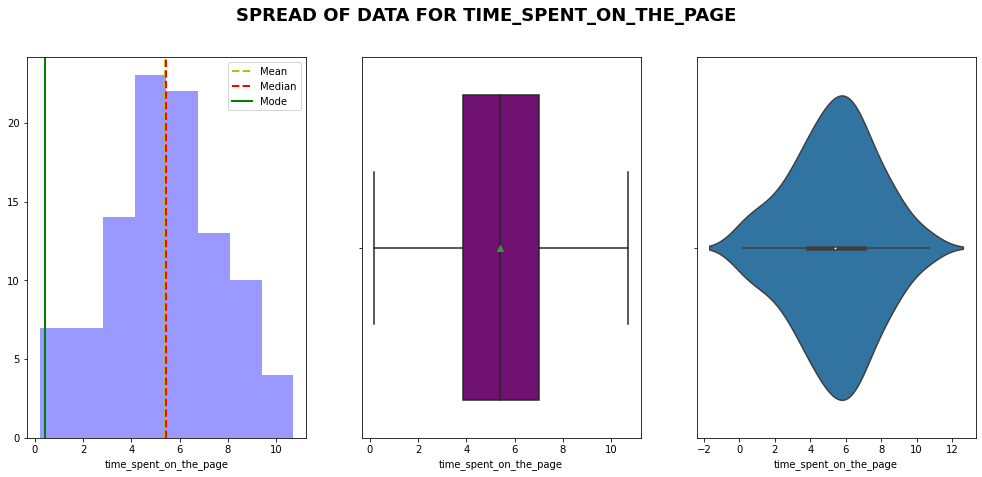

In [17]:
def dist_box_violin(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig, axes =plt.subplots(1,3,figsize=(17, 7))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.distplot(data,kde=False,color='Blue',ax=axes[0])
    axes[0].axvline(data.mean(), color='y', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(x=data,showmeans=True, orient='h',color="purple",ax=axes[1])
    #just exploring violin plot
    sns.violinplot(data,ax=axes[2],showmeans=True)
dist_box_violin(enews.time_spent_on_the_page)

#### Insights:
* Mode of time_spent_on_the_page is 0.4 which is less than mean and median. 
* Mean (5.378) and median (5.415) are very close to each other. 
* spread of values is from 0.190 to 10.710
* Distribution looks close to normal, as there are 100 samples 100>30.
* 1st Quartile (25% of time users spent) is less than 3.880 mins
* 2nd Quartile (50% of time users spent) is less than 5.415 mins
* 3rd Quartile (75% of time users spent) is less 7.0225 mins
* Inter Quartile Range:(50% of time users spent) is between 7.0025 mins and 3.880

## Univariate Analysis of Categorical variables:

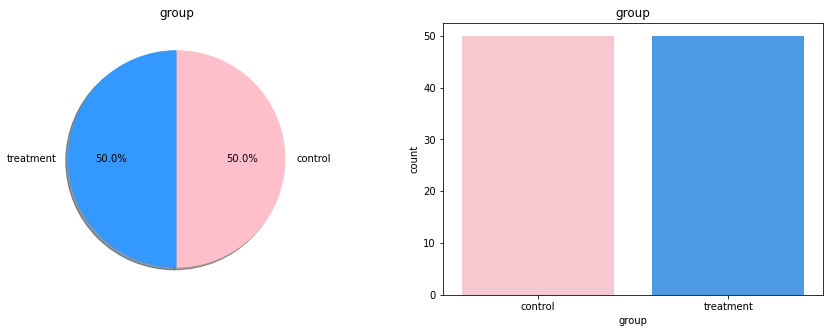

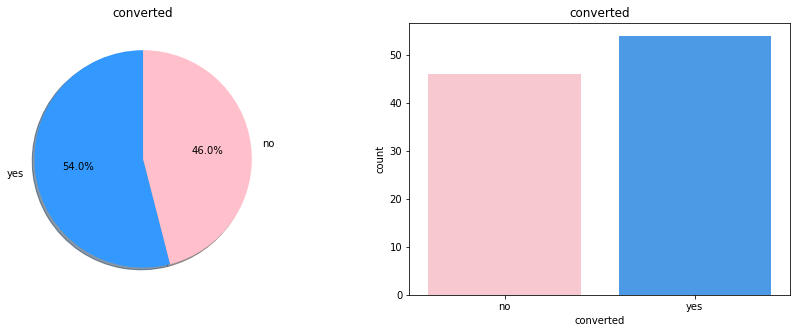

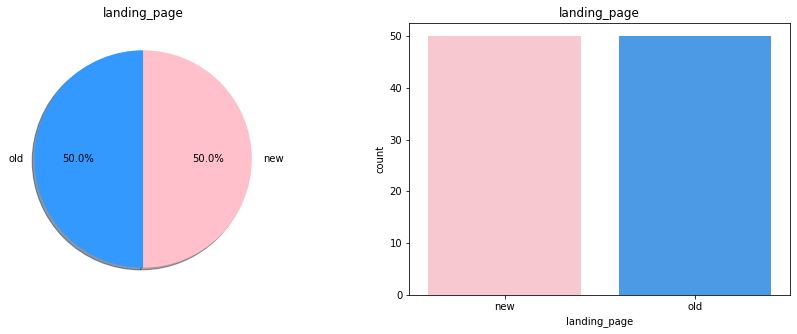

In [18]:
# Display count plots and pie charts of categorical variables
list_col=['group','converted','landing_page']
colors_list = ['#3399ff', 'pink', '#cc99ff', 'Maroon']
for i in range(len(list_col)):
    ## Name=data.name.upper()
    f,ax=plt.subplots(1,2,figsize=(15,5))
    enews[list_col[i]].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],startangle=90,shadow=True,colors = colors_list)
    ax[0].set_title(list_col[i])
    ax[0].set_ylabel('')
    sns.countplot(list_col[i],data=enews,ax=ax[1],palette =(['pink','#3399ff','#cc99ff']))
    ax[1].set_title(list_col[i])
    plt.show()



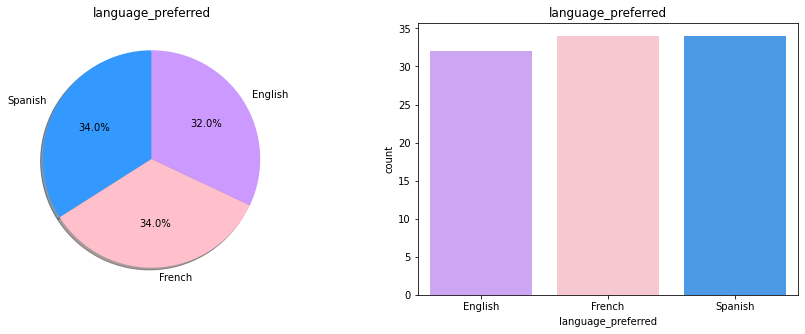

In [19]:
# function to display count plots and pie charts of categorical variable: language_preferred
colors_list = ['#3399ff', 'pink', '#cc99ff', 'Maroon']
f,ax=plt.subplots(1,2,figsize=(15,5))
enews['language_preferred'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],startangle=90,shadow=True,colors = colors_list)
ax[0].set_title('language_preferred')
ax[0].set_ylabel('')
sns.countplot('language_preferred',data=enews,ax=ax[1],palette =(['#cc99ff','pink','#3399ff']))
ax[1].set_title('language_preferred')
plt.show()



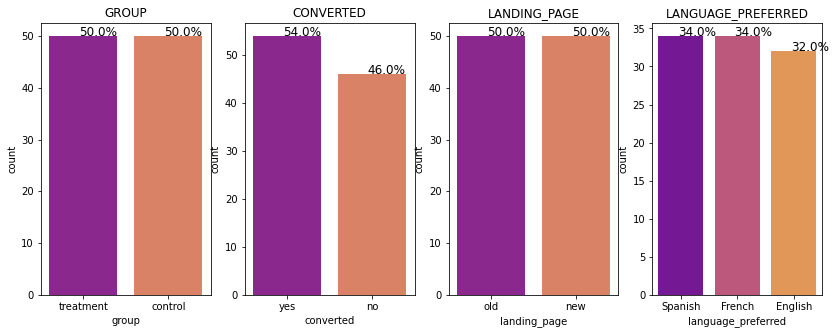

In [20]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage
    
fig1, axes1 =plt.subplots(1,4,figsize=(14,5))
list_col=['group','converted','landing_page','language_preferred']
j=0
for i in range(len(list_col)):
    order = enews[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=enews , order=order,ax=axes1[i],palette='plasma').set(title=list_col[i].upper())
    bar_perc(axes1[i],enews[list_col[i]])


#### Insights:
* 100 users are divided equally between Control group and Treatment group, 50% each group. 
* Control group had old page and Treatment group had new page.
* Out of 100 users 54% are converted and 46% not converted
* Out of 100 users 34% preferred Spanish, 32% preferred English and 34% preferred French

## Bivariate Analysis of variables:

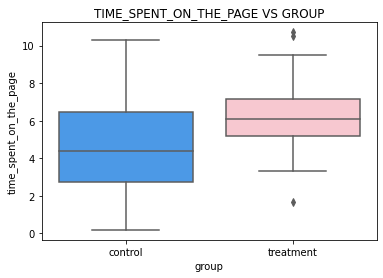

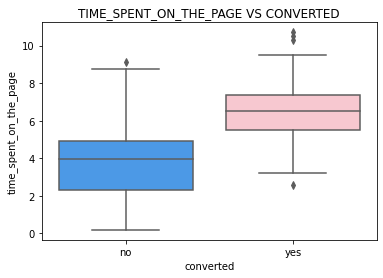

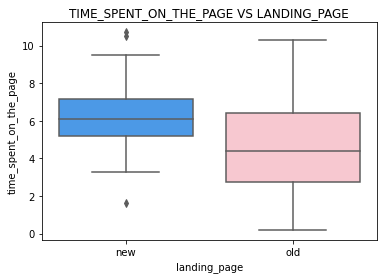

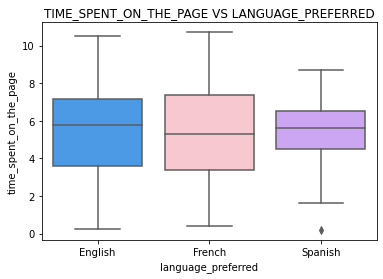

In [21]:
# display box plots of all variables VS time_spent_on_the_page
list_col=['group','converted','landing_page','language_preferred']
for i in range(len(list_col)):
    order = enews[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.boxplot(list_col[i],'time_spent_on_the_page', data=enews,palette= colors_list).set(title=("time_spent_on_the_page VS "+list_col[i]).upper())
    plt.show()

#### Insights: Time spent on page vs other variables box plot:
* - Treatment group: More users spent time between 5 and 7.There are some outliers at 2 or less, at lower end and 10 or more at higher end.
  - Control group: More users spent time between 3 and 6.5.
* - Converted: More users spent time between 5 and 7.There are some outliers at 2 or less, at lower end and 10 or more at higher end.
  - not converted: More users spent time between2.5 and 5.There are some outliers at 9.
* - Landing page: More users spent time between 5 and 7.There are some outliers at 2 or less, at lower end and 10 or more at higher end.
  - Old page: More users spent time between 3 and 6.5.
* - English: More users spent time between 3.5 and 7.
  - French: More users spent time between 3.5 and 7.5.
  - Control group: More users spent time between 3 and 6.5.There are some outliers at 1 or less.

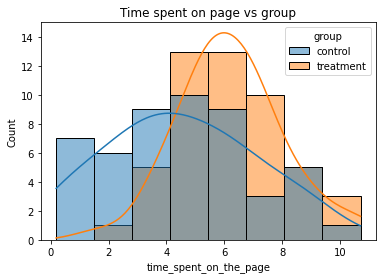

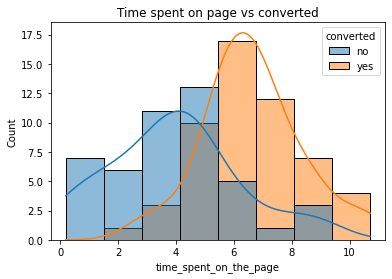

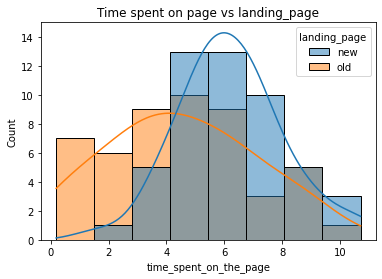

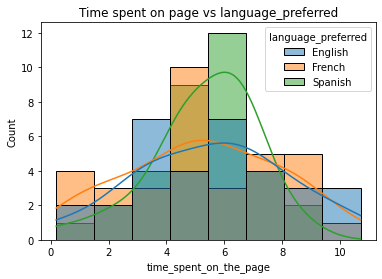

In [22]:
# Display hist plots of all variables VS time_spent_on_the_page
list_col=['group','converted','landing_page','language_preferred']
for i in range(len(list_col)):
    order = enews[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.histplot(data=enews, x="time_spent_on_the_page", hue=list_col[i], kde = True)
    plt.title("Time spent on page vs "+ str(list_col[i]));
    plt.show()

#### Insights: Distributions of Time spent vs categorical variables
* <b>Group:</b><br> 
  - Treatment group spent from 2-10 mins, its distribution is a little skewed towards left.Most values are between 4 and 6.<br>
  - Control group spent from 0 to 10 mins, its distribution height is not very high. Most values are between 3 and 6.<br>
* <b>Converted: </b><br>
  - Converted users spent 2-10 mins, most at 6. distribution is a little skewed towards left.(users spent more time on page).<br>
  - Not Converted users spent 0-9 mins, most at 5. distribution is a little skewed towards right.(users spent less time on page).<br>
* <b>Landing page:</b><br>
 - New page users spent from 2-10 mins, its distribution is a little skewed towards left.Most values are between 5 and 6.<br>
  - Old page users spent from 0 to 10 mins, its distribution height is not very high. Most values are between 3-6.<br>
* <b>Language preferred:</b><br>
 - Spanish users spent from 0-10 mins. Most values are at 6.<br>
 - French users spent from 0 to 10 mins,Most values are at 5.<br>
 - English users spent from 0 to 10 mins,Most values are at 4 and 6.<br>

           time_spent_on_the_page
group                            
control                    226.62
treatment                  311.16


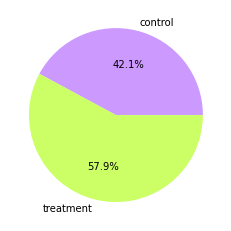

In [23]:
# pie chart of group vs time_spent_on_the_page
group_data = enews.groupby('group')[['time_spent_on_the_page']].sum()
print(group_data)

colors_list = ['#cc99ff','#ccff66','#3399ff']

plt.pie(group_data['time_spent_on_the_page'],autopct='%1.1f%%', labels = group_data.index, colors = colors_list)

plt.show()

* Total time spent on page by new page users is greater than old page users

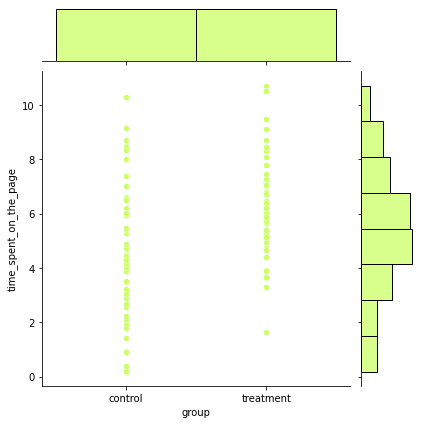

In [24]:
# joint plot of group VS time_spent_on_the_page
sns.jointplot(enews['group'],enews['time_spent_on_the_page'],color='#ccff66');
plt.show()


* Total time spent on page by new page users is greater than old page users
* Old page users spent mostly 0-9mins with some outliers at 10 mins.
* New page users spent mostly 3-10mins with some outliers between 1 and 2 mins.

## Multivariate Analysis of variables:

<Figure size 1080x720 with 0 Axes>

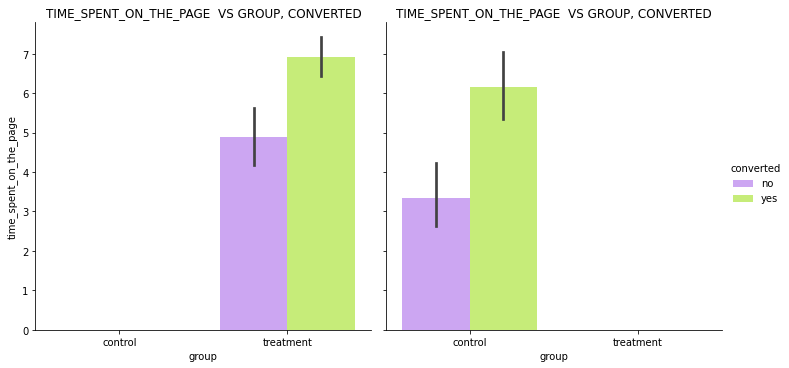

In [25]:
# The function is to plot categorical analysis between two quantitative features for multiple values of a 
# qualitative feature, categorized per another qualitative feature
def categorical_plots(df, x, y, hue, col):
    plt.figure(figsize=(15, 10));
    sns.catplot(data=df, x=x, y=y, hue=hue, col = col, kind='bar',palette= colors_list).set(title=("Time_spent_on_the_page  VS group, converted").upper());

# Categorical plot for each gender, plotting Usage vs Income per product
categorical_plots(enews, 'group', 'time_spent_on_the_page', 'converted', 'landing_page')


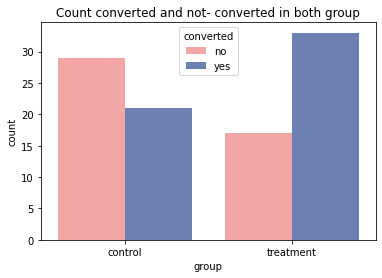

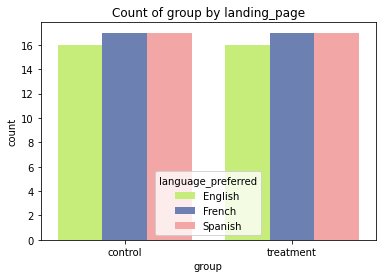

In [26]:
# The coutplot to show relationship between Group, converted and landing page
plt.title('Count converted and not- converted in both group');
sns.countplot(enews['group'], hue=enews['converted'],palette=['#ff9999','#607bbc']);
plt.show()
plt.title('Count of group by landing_page');
sns.countplot(enews['group'], hue=enews['language_preferred'],palette=['#ccff66','#607bbc','#ff9999']);
plt.show()

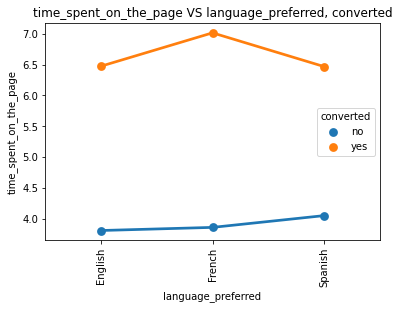

In [27]:
# # display point plot of time_spent_on_the_page vs language_preferred and converted 
sns.pointplot(x='language_preferred', y='time_spent_on_the_page', hue='converted',data=enews,  ci=None);
plt.title('time_spent_on_the_page VS language_preferred, converted')
plt.xticks(rotation=90); # To rotate the x axis labls

* Treatment group:converted users spent almost 7 mins or less on page and non-converted users spent 5 or less mins.
* Control group:converted users spent almost 6 mins or less on page and non-converted users spent 3.4 or less mins. 
* Count of Spanish and French users is same while count of English language users is less than count of French and Spanish users in both the groups.

Text(0.5, 1.0, '\n time_spent_on_the_page VS landing_page, language_preferred, converted \n \n \n')

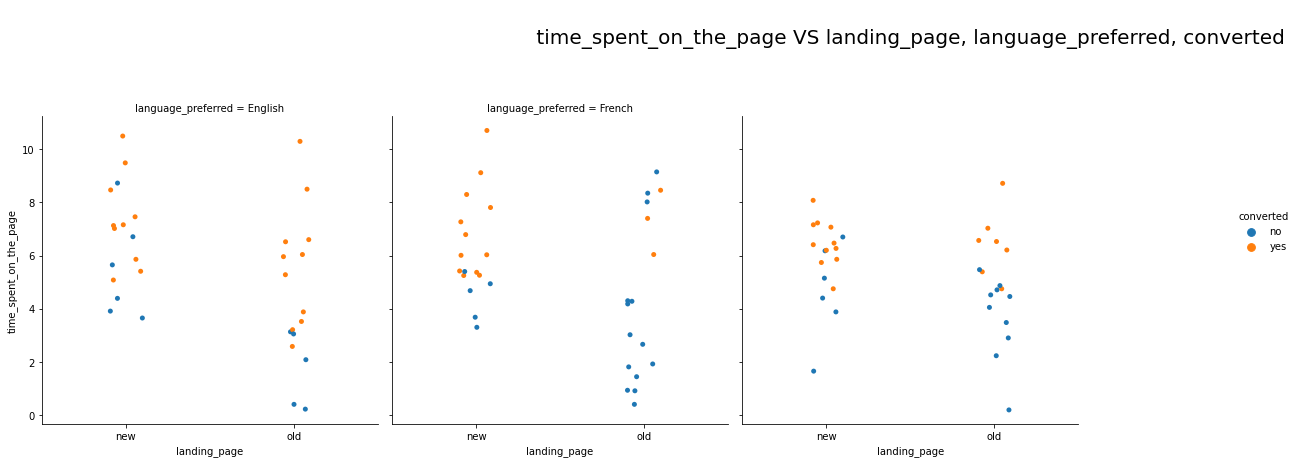

In [28]:
# display strip cat plots of all variables VS time_spent_on_the_page
sns.catplot(x="landing_page",
           y='time_spent_on_the_page',
           hue='converted',
           col='language_preferred',
           data= enews,
           kind= 'strip');
plt.title('\n time_spent_on_the_page VS landing_page, language_preferred, converted \n \n \n', fontsize='20')

Text(0.5, 1.0, '\n time_spent_on_the_page VS landing_page, language_preferred, converted \n \n \n')

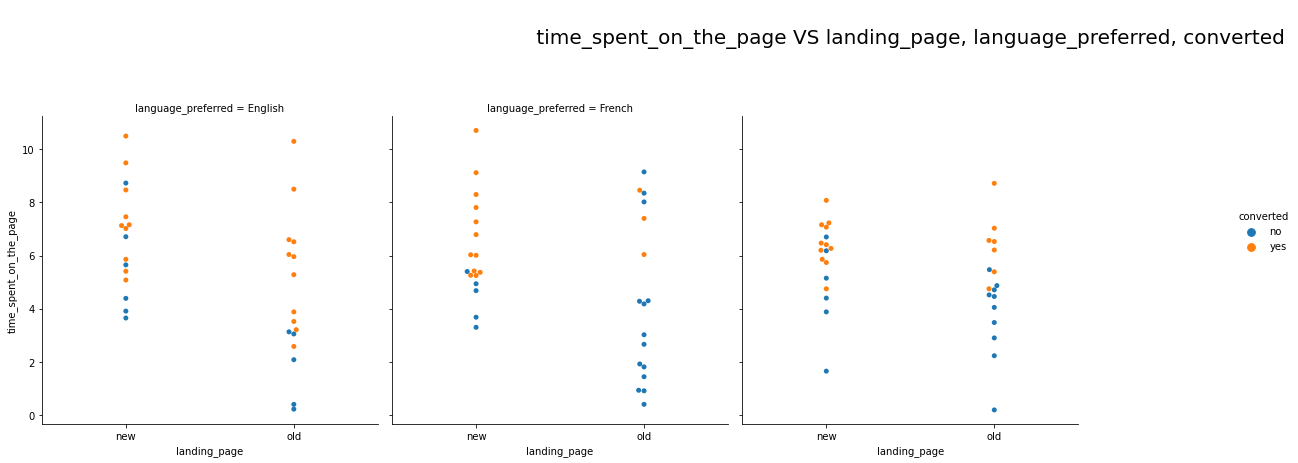

In [29]:
# display swarm cat plots of all variables VS time_spent_on_the_page
sns.catplot(x="landing_page",
           y='time_spent_on_the_page',
           hue='converted',
           col='language_preferred',
           data= enews,
           kind= 'swarm');
plt.title('\n time_spent_on_the_page VS landing_page, language_preferred, converted \n \n \n', fontsize='20')

Text(0.5, 1.0, '\n time_spent_on_the_page VS landing_page, language_preferred, converted \n \n \n')

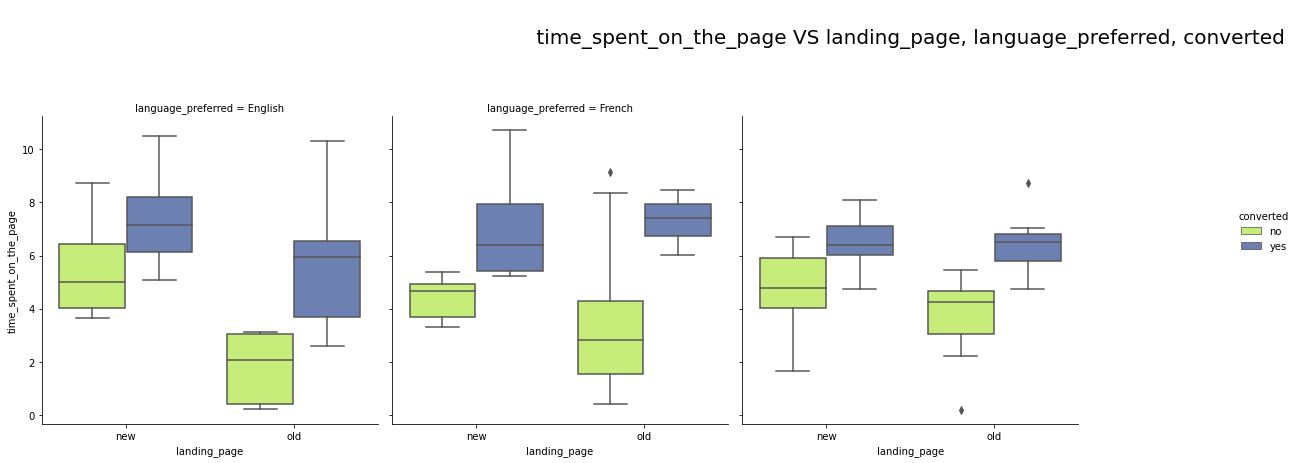

In [30]:
# # display cat box plots of all variables VS time_spent_on_the_page
sns.catplot(x="landing_page",
               y = "time_spent_on_the_page",
               hue="converted", 
               col="language_preferred", 
               data=enews, 
               kind="box",
               palette= ['#ccff66','#607bbc','#ff9999']);
plt.title('\n time_spent_on_the_page VS landing_page, language_preferred, converted \n \n \n',fontsize='20')

Text(0.5, 1.0, 'time_spent_on_the_page VS landing_page, language_preferred, converted \n \n \n')

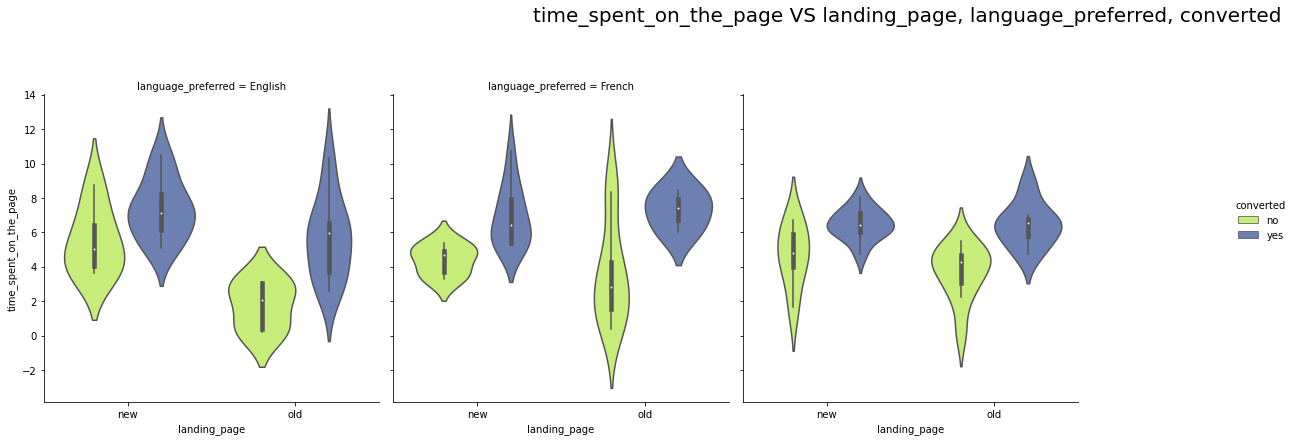

In [31]:
# display voilin cat plots of all variables VS time_spent_on_the_page
sns.catplot(x="landing_page",
               y = "time_spent_on_the_page",
               hue="converted", 
               col="language_preferred", 
               data=enews, 
               kind="violin",
               palette= ['#ccff66','#607bbc','#ff9999']);
plt.title('time_spent_on_the_page VS landing_page, language_preferred, converted \n \n \n', fontsize='20')

* English: 
    - New page: more between 3-7 mins, a few above.More number converted than not.
        + Time spent by Converted:6-8
        + Time spent by Not converted:4-6.5
    - Old page: more between 2-7 mins, a few above and below.More number converted than not.
        + Time spent by Converted:3.5-6.5
        + Time spent by Not converted:0.5-3
* French: 
    - New page: more between 4-8 mins, a few above.More number converted than not.
        + Time spent by Converted:5-8
        + Time spent by Not converted:3-5
    - Old page: more between 2-5 mins, a few above and below.More number not converted than converted.
        + Time spent by Converted:7-8
        + Time spent by Not converted:1-4.5
* Spanish: 
    - New page: more between 4-8 mins, a few above.More number converted than not.
        + Time spent by Converted:6-7
        + Time spent by Not converted:4-6
    - Old page: more between 2-7 mins, a few above and below.almost equal amount converted and not converted.
        + Time spent by Converted:6-7
        + Time spent by Not converted:3-4.5

### Analysis of Control Group

In [32]:
# control variable has all data where group is control
control=enews[enews['group']=='control']
control.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,50,50,546592,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group,50,1,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,50,1,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,50,NaN,NaN,NaN,4.5324,2.58197,0.19,2.72,4.38,6.4425,10.3
converted,50,2,no,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,50,3,Spanish,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# check variance and mode of control group
var_c=control.var()
mod_c=control['time_spent_on_the_page'].mode().value_counts()
var_c, mod_c

(time_spent_on_the_page    6.666594
 dtype: float64,
 6.04    1
 0.40    1
 dtype: int64)

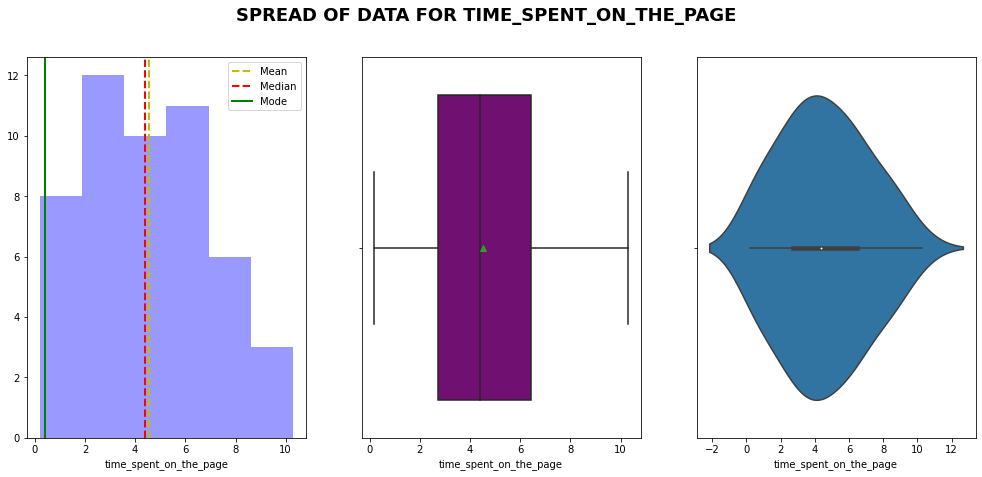

In [34]:
# distplot, boxplot and voilin plot of control group time_spent_on_the_page
dist_box_violin(control.time_spent_on_the_page)

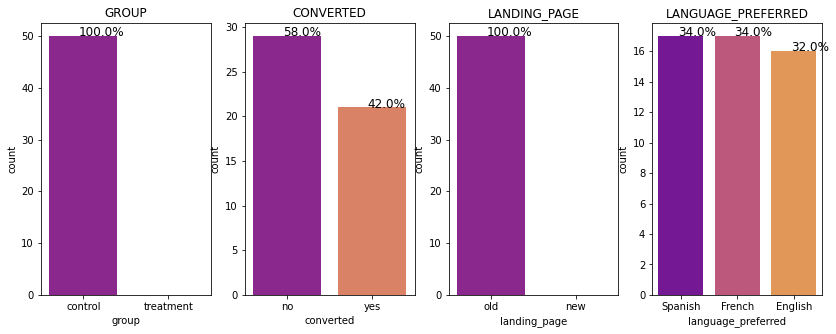

In [35]:
# Function to create barplots that indicate percentage for each category.
def bar_perc2(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

fig1, axes1 =plt.subplots(1,4,figsize=(14,5))
list_col=['group','converted','landing_page','language_preferred']
j=0
for i in range(len(list_col)):
    order = control[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=control , order=order,ax=axes1[i],palette='plasma').set(title=list_col[i].upper())
    bar_perc2(axes1[i],control[list_col[i]])


####  Insights: Control Group: Old page users: Time spent on page
* Total records: 50
* Mean: 4.532
* Median: 4.38
* Q1(25%): 2.27, Q3(75%): 6.443
* Standard deviation: 2.582
* Variance: 6.667
* Minimum: 0.19, Maximum: 10.3
* Not converted: 29  (58%, 42% converted)
* Language: Spanish: 34%, French: 34%, English 32%

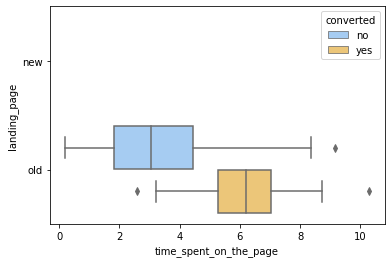

In [36]:
# # box plot of time_spent_on_the_page vs landing_page and converted for control group
colors_list_g=['#99ccff','#ffcc66','#ccff66','#ffff99','#ff9999']
sns.boxplot(control['time_spent_on_the_page'], control['landing_page'], hue=control['converted'],palette= colors_list_g);

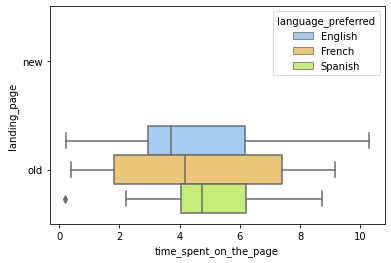

In [37]:
# # box plot of time_spent_on_the_page vs landing_page and language_preferred for control group
sns.boxplot(control['time_spent_on_the_page'], control['landing_page'], hue=control['language_preferred'],palette= colors_list_g);

Old page users:<br>
    * Converted users spent between 5 and 7 mins, some outliers below 3 and above 10.<br>
    * Not Converted users spent between 2 and 4.5 mins, some outliers at 9.<br>
Language preferred: <br>
    * English: users spent 3-6 mins, median at 3.5 mins<br>
    * French: users spent 2-7.5 mins, median at 4 mins<br>
    * Spanish: users spent 4-6.2 mins, median at about 5, outliers at below 0.5

### Analysis of Treatment Group

In [38]:
# treatment variable has all data where group is treatment
treatment=enews[enews['group']=='treatment']
treatment.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,50,50,546492,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group,50,1,treatment,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,50,1,new,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,50,NaN,NaN,NaN,6.2232,1.81703,1.65,5.175,6.105,7.16,10.71
converted,50,2,yes,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,50,3,Spanish,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# check variance and mode of control group
var_t=treatment.var()
mod_t=treatment['time_spent_on_the_page'].mode().value_counts()
var_t, mod_t


(time_spent_on_the_page    3.301602
 dtype: float64,
 7.16    1
 5.86    1
 dtype: int64)

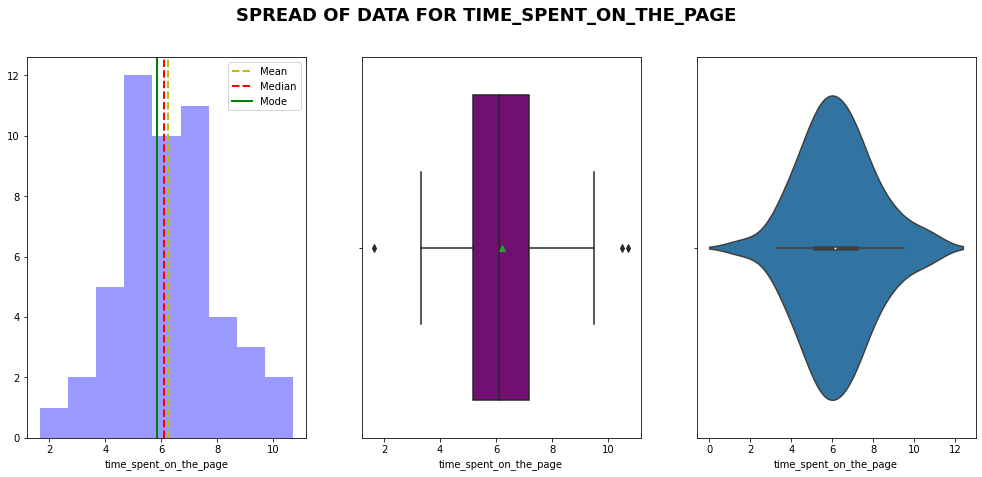

In [40]:
# distplot, boxplot and voilin plot of treatment group time_spent_on_the_page
dist_box_violin(treatment.time_spent_on_the_page)

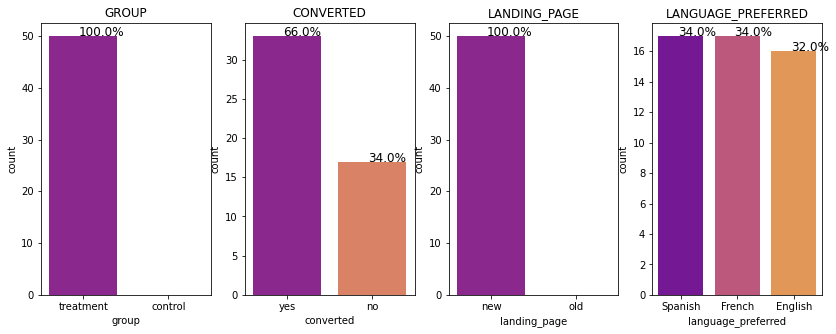

In [41]:
fig1, axes1 =plt.subplots(1,4,figsize=(14,5))
list_col=['group','converted','landing_page','language_preferred']
j=0
for i in range(len(list_col)):
    order = treatment[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=treatment , order=order,ax=axes1[i],palette='plasma').set(title=list_col[i].upper())
    bar_perc(axes1[i],treatment[list_col[i]])


####  Insights: Treatment Group: New page users: Time spent on page
* Total records: 50
* Mean: 6.2232
* Median: 6.105
* Q1(25%): 5.175, Q3(75%): 7.16
* Standard deviation: 1.82
* Variance: 3.3016
* Minimum: 1.65, Maximum: 10.71
* Converted: 33 (66%, 34% not converted)
* Language: Spanish: 34%, French: 34%, English 32%

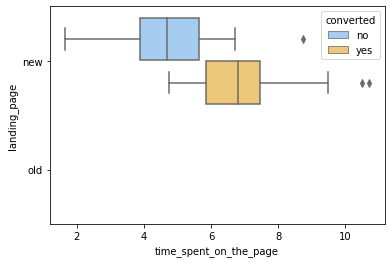

In [42]:
sns.boxplot(treatment['time_spent_on_the_page'], treatment['landing_page'], hue=treatment['converted'],palette= colors_list_g);

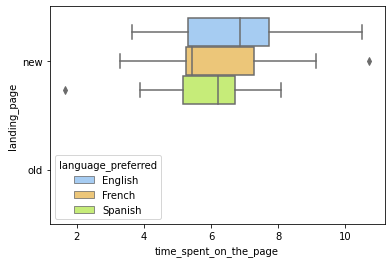

In [43]:
sns.boxplot(treatment['time_spent_on_the_page'], treatment['landing_page'], hue=treatment['language_preferred'],palette= colors_list_g);

New page users:<br>
    * Converted users spent between 6 and 7.5 mins, some outliers at above 10.<br>
    * Not Converted users spent between 3.5 and 6 mins, some outliers at above 9.<br>
Language preferred: <br>
    * English: users spent 5-8 mins, median at 7 mins<br>
    * French: users spent 5-7.5 mins, median at 5 mins<br>
    * Spanish: users spent 5-7 mins, median at 6

### Check percentages/ proportions of converted and language preferred

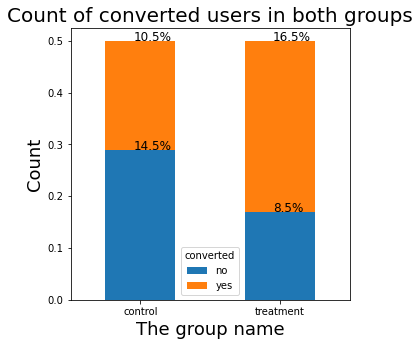

In [44]:
# count-percentage bar plot of converted users of all groups
## I will use the crosstab to explore two categorical values
# At index I will use set my variable that I want analyse and cross by another
crosstab_eda = pd.crosstab(index=enews['group'], normalize=True,
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=enews[enews['converted'].isin(enews['converted']\
                                                                            .value_counts().index.values)]['converted'])
# Ploting the crosstab that we did above
axis1=crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(5,5), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Count of converted users in both groups", fontsize=20) # seting the title size
plt.xlabel("The group name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=0)
bar_perc(axis1,crosstab_eda)
plt.show() # rendering

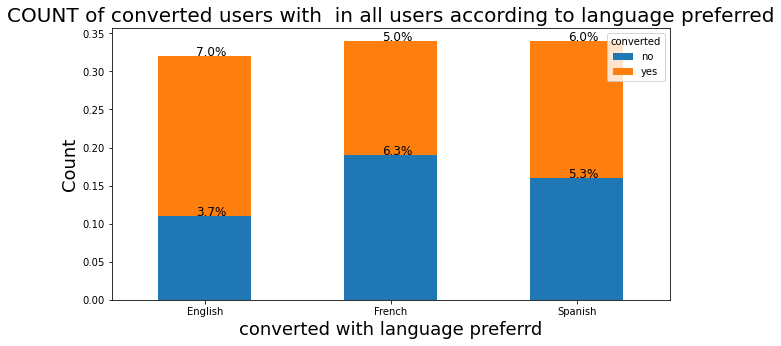

In [45]:
# count-percentage bar plot of language preferred by all users
## I will use the crosstab to explore two categorical values
# At index I will use set my variable that I want analyse and cross by another
crosstab_la = pd.crosstab(index=enews['language_preferred'], normalize=True,
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=enews[enews['converted'].isin(enews['converted']\
                                                                            .value_counts().index.values)]['converted'])
# Ploting the crosstab that we did above
axis1=crosstab_la.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(10,5), # adjusting the size of graphs
                 stacked=True)   # code to unstack 

plt.title("COUNT of converted users with  in all users according to language preferred", fontsize=20) # seting the title size
plt.xlabel("converted with language preferrd", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=0)
bar_perc(axis1,crosstab_la)
plt.show() # rendering

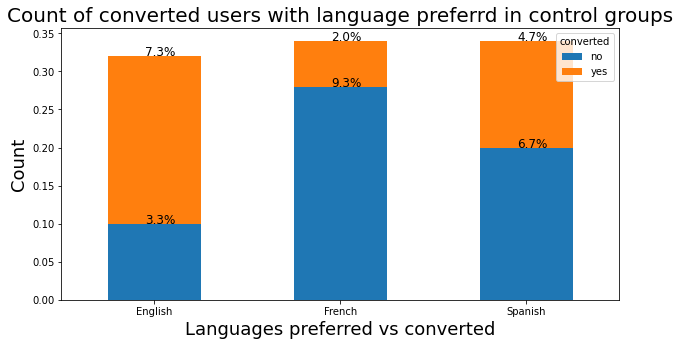

In [46]:
# count-percentage bar plot of language preferred by control group
## I will use the crosstab to explore two categorical values
# At index I will use set my variable that I want analyse and cross by another
crosstab_c = pd.crosstab(index=control['language_preferred'], normalize=True,
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=control[control['converted'].isin(control['converted']\
                                                                            .value_counts().index.values)]['converted'])
# Ploting the crosstab that we did above
axis1=crosstab_c.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(10,5), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Count of converted users with language preferrd in control groups", fontsize=20) # seting the title size
plt.xlabel("Languages preferred vs converted", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=0)
bar_perc(axis1,crosstab_c)
plt.show() # rendering

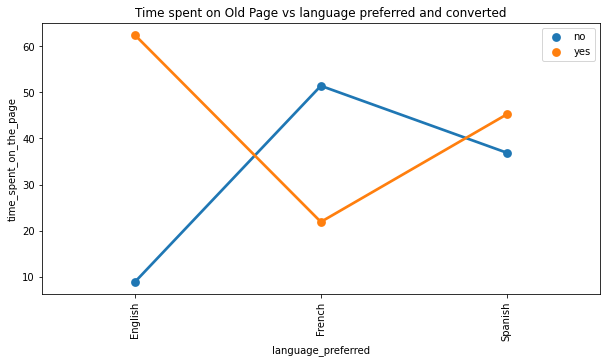

In [47]:
# hue  parameter: converted to the pointplot to plot for each preferred language for control group
plt.figure(figsize = (10,5)); # To resize the plot
sns.pointplot(x='language_preferred', y='time_spent_on_the_page', data=control, estimator=sum, ci=None, hue = 'converted');
plt.legend(bbox_to_anchor=(1, 1));
plt.title('Time spent on Old Page vs language preferred and converted')
plt.xticks(rotation=90); # To rotate the x axis labls

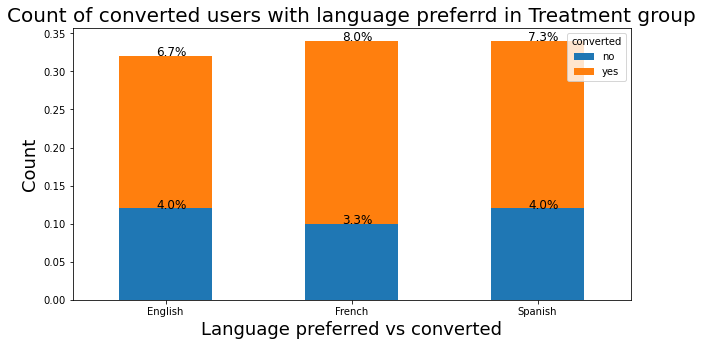

In [48]:
# count-percentage bar plot of language preferred by treatment group
## I will use the crosstab to explore two categorical values
# At index I will use set my variable that I want analyse and cross by another
crosstab_t = pd.crosstab(index=treatment['language_preferred'], normalize=True,
                           # at this line, I am using the isin to select just the top 5 of browsers
                           columns=treatment[treatment['converted'].isin(treatment['converted']\
                                                                            .value_counts().index.values)]['converted'])
# Ploting the crosstab that we did above
axis1=crosstab_t.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(10,5), # adjusting the size of graphs
                 stacked=True)   # code to unstack 
plt.title("Count of converted users with language preferrd in Treatment group", fontsize=20) # seting the title size
plt.xlabel("Language preferred vs converted", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=0)
bar_perc(axis1,crosstab_t)
plt.show() # rendering

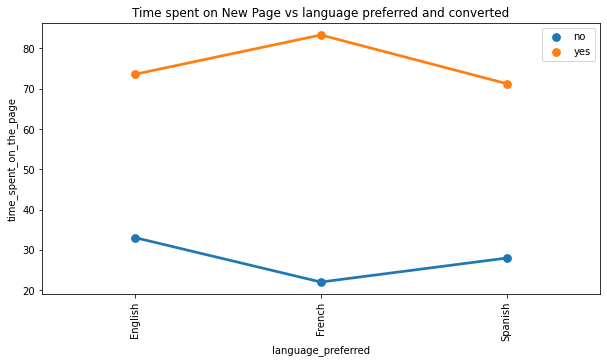

In [49]:
# hue parameter converted to the pointplot to plot for each preferred language by treatment group
plt.figure(figsize = (10,5)); # To resize the plot
sns.pointplot(x='language_preferred', y='time_spent_on_the_page', data=treatment, estimator=sum, ci=None, hue = 'converted');
plt.legend(bbox_to_anchor=(1, 1));
plt.title('Time spent on New Page vs language preferred and converted')
plt.xticks(rotation=90); # To rotate the x axis labls

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Hypothesis Testing

#  2. Do the users spend more time on the new landing page than the old landing page?
*Consider a significance level of 0.05 for all tests.

### Insights:

* Continuous data - Yes, the time spent is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


In [50]:
# check the control user data
control.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English


### Let's write the null and alternative hypothesis


Let $\mu_1, \mu_2$ be the mean time spent on the page by **treatment group**  and **control group** respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Let's test whether the two independent sample T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent on the page is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
* level of significance ($\alpha$)=0.05

In [51]:
# function to plot distribution of given data
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color ='k',linestyle='dashed', linewidth=5)
    _,max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean; {:.2f}".format(inp.mean()),
        
    )
    return plt.figure

In [52]:
# import the required function
from scipy.stats import norm

# estimate the mean and standard deviation of the time spent by control group
mu1 = control["time_spent_on_the_page"].mean()
sigma1 = control["time_spent_on_the_page"].std(ddof=1)
print("The estimated mean time spent by control users is", round(mu1, 2))
print("The estimated standard deviation of time spent by control users is", round(sigma1, 2))

The estimated mean time spent by control users is 4.53
The estimated standard deviation of time spent by control users is 2.58


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

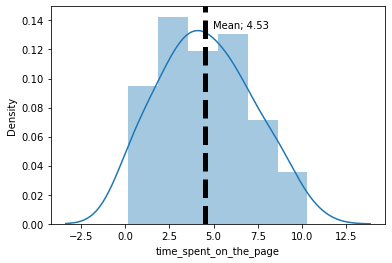

In [53]:
# plot distribution of time_spent_on_the_page by control users
plot_distribution(control["time_spent_on_the_page"])

In [54]:
# confidence interval of control group
# set the values of sample mean and sigma
x_bar, sigma = 4.53, 2.58

# set the value of sample size
n = 50

# construct the confidence interval
np.round(norm.interval(0.95, loc=x_bar, scale=sigma / np.sqrt(n)), 2)

array([3.81, 5.25])

Population mean of old page users lie between 3.81 and 5.25

In [55]:
# check the treatment user data
treatment.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [56]:
# import the required function
from scipy.stats import norm

# estimate the mean and standard deviation of the time spent by treatment group
mu = treatment["time_spent_on_the_page"].mean()
#sigma = treatment["time_spent_on_the_page"].std()
#standard deviation
sigma = treatment["time_spent_on_the_page"].std(ddof=1)
print("The estimated mean time spent by treatment users is", round(mu, 2))
print("The estimated standard deviation of time spent by treatment users is", round(sigma, 2))

The estimated mean time spent by treatment users is 6.22
The estimated standard deviation of time spent by treatment users is 1.82


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

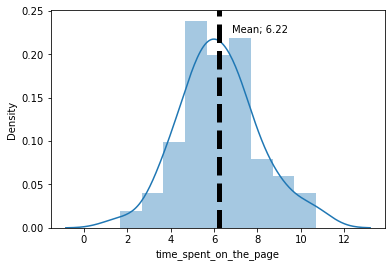

In [57]:
# plot distribution of time_spent_on_the_page by treatment users
plot_distribution(treatment["time_spent_on_the_page"])

In [58]:
# confidence interval of treatment group
# set the values of sample mean and sigma
x_bar, sigma = 6.22, 1.82

# set the value of sample size
n = 50

# construct the confidence interval
np.round(norm.interval(0.95, loc=x_bar, scale=sigma / np.sqrt(n)), 2)

array([5.72, 6.72])

Population mean time of new page users lie between 5.72 and 6.72

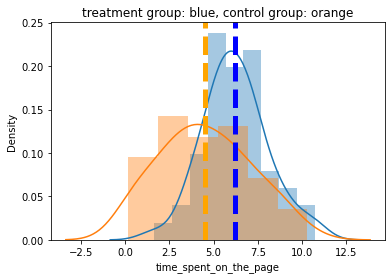

In [59]:
# Plot both control and treatment distributions side by side to compare them
plt.figure()
ax1 =sns.distplot(treatment["time_spent_on_the_page"])
ax2 =sns.distplot(control["time_spent_on_the_page"])
plt.axvline(np.mean(treatment["time_spent_on_the_page"]), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(control["time_spent_on_the_page"]), color='orange', linestyle='dashed', linewidth=5)
plt.title("treatment group: blue, control group: orange") # set the title
#plt.legend(labels=mu,mu1)
plt.show()

In [60]:
diff= mu-mu1   # difference between treatment group mean and control group mean
s_e=np.sqrt(1/50+1/50)
diff, s_e  # standard error

(1.6907999999999994, 0.2)

The difference between sample means of time spent by new page users and old page users is: 1.691

In [61]:
# Pooled estimate of common standard deviation
st_p=np.sqrt(((50-1)*(2.58**2)+(50-1)*(1.82**2))/(50+50-2))
st_p

2.232576986354558

In [62]:
# confidence interval using t distribution
# import the required function
from scipy.stats import t

# set the values of sample mean and sample standard deviation
x_bar, s = diff, st_p

# set the value of sample size and degrees of freedom
n = 100
k = n - 1

# construct the confidence interval
print("Confidence interval: ", np.round(t.interval(0.95, df=k, loc=x_bar, scale=s / np.sqrt(n)), 2))

Confidence interval:  [1.25 2.13]


#### Insights:
The mean time spent on page by control group is 4.53
The mean time spent on page by treatment group is 5.22
With 95% confidence the difference between old page users population and new page users population is between 1.25 and 2.13. Our best point estimate is ~1.691 minutes.The margin of error is 0.2.

### Let's find the p-value

In [63]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value and test statistic
test_stat, p_value = ttest_ind(treatment["time_spent_on_the_page"], control["time_spent_on_the_page"].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)
print('The t statistic is ', test_stat)

The p-value is  0.0001392381225166549
The t statistic is  3.7867702694199856


### Compare the p-value with $\alpha$

In [64]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


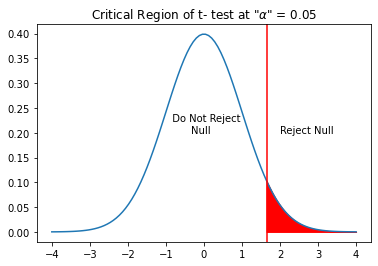

In [65]:
# find the critical value
critical_val = norm.ppf(1-.05)
critical_val
# plotting the test statistic distribution and indicating the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_val, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(critical_val, 4, 50) # create an array of 50 numbers starting from the critical value and ending at 4
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve after the critical value with red color
plt.annotate('Reject Null', (2, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.title('Critical Region of t- test at "$ \\alpha $" = 0.05')
plt.show() # display the plot

### Insights:
* p-value is 0.00013 which is very less than the alpha 0.05 
* test statistic is 3.79 which also lies in the critical region.
* So we can reject the null hypothesis that mean time spent on the page by old and new users is same.

#  3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### The null and alternative hypothesis


Let $ p_1, p_2$ be the proportion of users visiting the new and old page by **treatment group**  and **control group**, and got converted, respectively.

We will test the null hypothesis

>$H_0: p_1 = p_2$  : The conversion rate of users of both pages is same.

against the alternate hypothesis

>$H_a: p_1 > p_2$ :  The conversion rate of users of new page is greater than that of old page.

### Let's test whether the <u><b> Z-test </b></u> assumptions are satisfied or not

*   Binomally distributed population - Yes, a user is either converted or not converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
 n(1-p_1) = 50 \cdot \frac{50-33}{17} =17 \geq 10 $
> $np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
   n(1-p_2) = 50 \cdot \frac{50-21}{29} =29 \geq 10 $

### The proportion of conversion rate of new page users and old page users

In [66]:
# number of control converted users
treatment_conv = enews[enews['group']=='treatment'].converted.value_counts()['yes']
# number of treatment converted users
print('The converted numbers of users from treatment group are {}'.format(treatment_conv))

The converted numbers of users from treatment group are 33


In [67]:
# number of control converted users
control_conv = enews[enews['group']=='control'].converted.value_counts()['yes']
# number of treatment converted users
print('The converted numbers of users from control group are {}'.format(control_conv))

The converted numbers of users from control group are 21


In [68]:
# two sample proportion z test
# number of control users in data
control_n = enews.group.value_counts()['control']

# number of treatment users in the data
treatment_n = enews.group.value_counts()['treatment']
# total number of users in both groups
print('The total numbers of control group and treatment group are {0} and {1} respectively'.format(treatment_n, control_n))

The total numbers of control group and treatment group are 50 and 50 respectively


In [69]:
# proportions of converted users in treatment and control groups: 
# control converted/ control total
# treatment converted/ treatment total
print(f' The proportions of converted in treatment group and control group are ,{round(33/50,2)} , {round(21/50,2)} respectively')

 The proportions of converted in treatment group and control group are ,0.66 , 0.42 respectively


### Let's find the p-value

In [70]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest
# find the p-value using proportion_ztest
stat, pval = proportions_ztest([treatment_conv,control_conv ] , [treatment_n, control_n], alternative = 'larger')
# print the p-value
print('The p-value is '+ str(pval))
print('The test statistic is '+ str(stat))

The p-value is 0.008026308204056278
The test statistic is 2.4077170617153842


### Compare the p-value with $\alpha$

In [71]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


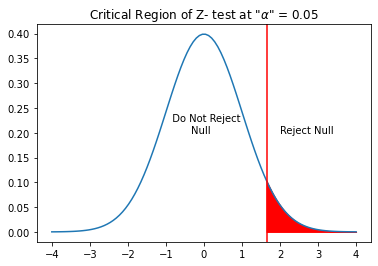

In [72]:
# find the critical value
critical_val = norm.ppf(1-.05)
critical_val
# plotting the test statistic distribution and indicating the rejection and acceptance region
# We are plotting the distributions here to better visualize the calculations
x = np.linspace(-4, 4, 100) # create an array of 100 numbers starting from -4 and ending at 4
plt.plot(x, norm.pdf(x, 0, 1)) # plot the pdf of the normal distribution
plt.axvline(x = critical_val, c = 'r') # draw a vertical red line through the mentioned point
x1 = np.linspace(critical_val, 4, 50) # create an array of 50 numbers starting from the critical value and ending at 4
plt.fill_between(x1, norm.pdf(x1, 0, 1), color='r') # fill the area under the curve after the critical value with red color
plt.annotate('Reject Null', (2, 0.20)) # annotate the mentioned text at the mentioned location
plt.annotate('  Do Not Reject\n        Null', (-1, 0.20)) # annotate the mentioned text at the mentioned location
plt.title('Critical Region of Z- test at "$ \\alpha $" = 0.05')
plt.show() # display the plot

### Insights:
* p-value is 0.00802 which is very less than the alpha 0.05 
* Test statistic is 2.408 which lies in the rejection regios, 
* so we can reject the null hypothesis that conversion rate of users of old and new page is same, rather new page users have a higher conversion rate. 

#  4. Does the converted status depend on the preferred language? 

### The null and alternative hypothesis:


We will test the null hypothesis

>$H_0:$ converted status is independent of preferred language.

against the alternate hypothesis

>$H_a:$ converted status depends on preferred language.

### Let's test whether the assumptions for $χ2 $ test are satisfied or not

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

In [73]:
# Crosstable showing relationship of Landing page and Time
pd.crosstab(control.converted, control.language_preferred).T

converted,no,yes
language_preferred,,
English,5,11
French,14,3
Spanish,10,7


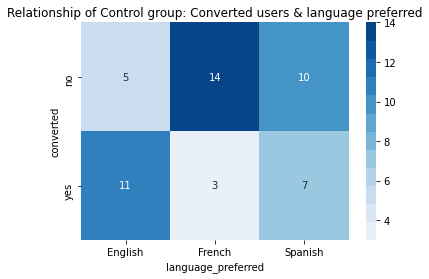

In [74]:
# Relationship between  of control group
plt.title('Relationship of Control group: Converted users & language preferred');
colormap=sns.color_palette("Blues",12)
sns.heatmap(pd.crosstab([control.converted], [control.language_preferred]),
            cmap=colormap, annot=True, cbar=True);

* Heatmap of control group shows big difference between converted and not-converted users in English language: Converted: 11, Not-converted: 5.
* French users have rather higher number of not converted: 14 vs converted: 3
* Spanich users have little difference converted:7, not-converted:10

In [75]:
# Crosstable showing relationship of Landing page and Time
pd.crosstab(treatment.converted, treatment.language_preferred).T

converted,no,yes
language_preferred,,
English,6,10
French,5,12
Spanish,6,11


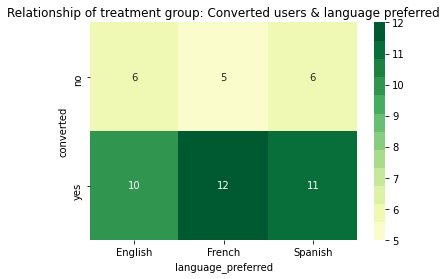

In [76]:
# Relationship between  of control group
plt.title('Relationship of treatment group: Converted users & language preferred');
colormap=sns.color_palette("YlGn",12)
sns.heatmap(pd.crosstab([treatment.converted], [treatment.language_preferred]),
            cmap=colormap, annot=True, cbar=True);

* Heatmap of treatment group shows bigger difference between converted and not-converted users in English language: Converted:  10, Not-converted: 6.
* French users have higher number of not converted: 5 vs converted: 12
* Spanich users have little difference converted:11, not-converted:6

In [77]:
# import the required function
from scipy.stats import chi2_contingency
# Crosstable showing relationship of Landing page and Time
test=pd.crosstab(enews.converted, enews.language_preferred)
test

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


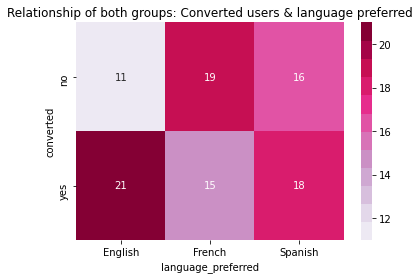

In [78]:
# Relationship between  of control group
plt.title('Relationship of both groups: Converted users & language preferred');
colormap=sns.color_palette("PuRd",12)
sns.heatmap(pd.crosstab([enews.converted], [enews.language_preferred]),
            cmap=colormap, annot=True, cbar=True);

* Heatmap of all data shows big difference between converted and not- converted users in English language:Converted: 21, Not-converted: 11.
* French users have rather higher number of not converted: 19 vs converted: 15
* Spanich users have little difference converted:18, not-converted:16

### Let's find the p-value

In [87]:
# prepare the data by grouping the required columns
chi2, pval, dof, exp_freq = chi2_contingency(test.drop('English', axis = 1))
# print the p-value
print('The p-value is', pval)
print('The chi square is', chi2)
print('The degree of freedom is', dof)

The p-value is 0.6274768949614127
The chi square is 0.23549783549783548
The degree of freedom is 1


In [89]:
# prepare the data by grouping the required columns
chi2, pval, dof, exp_freq = chi2_contingency(test.drop('French', axis = 1))
# print the p-value
print('The p-value is', pval)
print('The chi square is', chi2)
print('The degree of freedom is', dof)

The p-value is 0.4254784093951157
The chi square is 0.6351338612368025
The degree of freedom is 1


In [90]:
# prepare the data by grouping the required columns
chi2, pval, dof, exp_freq = chi2_contingency(test.drop('Spanish', axis = 1))
# print the p-value
print('The p-value is', pval)
print('The chi square is', chi2)
print('The degree of freedom is', dof)

The p-value is 0.1319632813072201
The chi square is 2.269255514705883
The degree of freedom is 1


In [85]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.6274768949614127 is greater than the level of significance, we fail to reject the null hypothesis.


### Insights:
* p-value is 0.213 which is greater than the alpha 0.05 
* Test statistic is 3.093 which does not lie in the rejection region, 
* so we fail to reject the null hypothesis that conversion rate of users is independent of preferred language. 

In [ ]:
# chi square distribution with varying degrees of freedom
fig = plt.figure(figsize = (8, 6))
x = np.linspace(0, 5, 100)
deg_of_freedom = [1, 2]
for df in deg_of_freedom:
    plt.plot(x, stats.chi2.pdf(x, df), label = '$df={}$'.format(df))

plt.xlim(0, 5)
plt.ylim(0, 0.5)
plt.xlabel('$\chi^2$')
plt.ylabel('$f(\chi^2)$')
plt.title('$\chi^2\ \mathrm{Distribution}$')
plt.legend()
plt.show()

#  5.  Is the mean time spent on the new page same for the different language users?

### ANOVA test for equality of means of more than two populations.

### The null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means time spent by English, French and Spanish users on new page respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least time spent by one language users is different from the rest.

In [ ]:
# check treatment data
treatment.head()

#### * Here, time_spent_on_the_page is the response and language_preferred is the factor.

In [ ]:
# number of control converted users
language_e = treatment[treatment['language_preferred']=='English'].time_spent_on_the_page.mean()
# number of treatment converted users
language_f = treatment[treatment['language_preferred']=='French'].time_spent_on_the_page.mean()
language_s = treatment[treatment['language_preferred']=='Spanish'].time_spent_on_the_page.mean()
print('The mean time spent by english users on new page are {}'.format(language_e))
print('The mean time spent by french users on new page are {}'.format(language_f))
print('The mean time spent by spanish users on new page are {}'.format(language_s))

In [ ]:
# mean of different languages
print(treatment.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = treatment, hue = 'language_preferred')
a.set_title("time_spent_on_the_page w.r.t. language_preferred (3 languages)", fontsize=15)
plt.show()

#### Insights: Time spent on new page vs languages
* English    6.663750
* French     6.196471
* Spanish    5.835294
* All means of time spent on new page by three language users are different.


#### * Now, the normality and equality of variance assumptions need to be checked. 

    * For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

    * For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ language_preferred follows a normal distribution,

against the alternative hypothesis

>$H_a:$ language_preferred does not follow a normal distribution

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(treatment['time_spent_on_the_page']) 
print('The p-value is', p_value)
print(w)

Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_val = levene( treatment['time_spent_on_the_page'][treatment['language_preferred']=='English'], 
                                   treatment['time_spent_on_the_page'][treatment['language_preferred']=='French'], 
                                   treatment['time_spent_on_the_page'][treatment['language_preferred']=='Spanish'])
# find the p-value
print('The p-value is', p_val)
print('The test statistic is', statistic)

In [ ]:
# print the conclusion based on p-value
if p_val < 0.05:
    print(f'As the p-value {p_val} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_val} is greater than the level of significance, we fail to reject the null hypothesis.')

Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Insight
As the p-value is much greater than the significance level 0.05, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the time spent on new page by, at least one language users, is different from the rest at 5% significance level.

### Multiple Comparison test (Tukey HSD)


In order to identify for which language mean time_spent_on_the_page is different from other groups in the new page,  <br>
Let's say 
    $𝜇_1, 𝜇_2 \text{ and } 𝜇_3 $ are mean time_spent_on_the_page by English, French and Spanish repectively.
the null hypothesis is
  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [ ]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = treatment['time_spent_on_the_page'], groups = treatment['language_preferred'], alpha = 0.05)
print(m_comp)

### Insights

As the p-values (refer to the p-adj column) for comparing the mean time_spent_on_the_page for all language pairs, the p-adj value is more than the significance level, the null hypothesis of equality of all population means is failed to reject.
This confirms the ANOVA test of variance.

Thus, we can say that the mean time spent by different language users is similar.

## Descriptive statistical Insights:
* 100 user records, 6 variables
*time_spent_on_the_page is float64 data type: representing time in minutes.
* user_id, group, landing_page, converted, language_preferred are of object data type, need to be converted to category.
* There is no missing value<br>
<b>Statistics of Numeric variable:  <u>time_spent_on_the_page</u></b> 
* Mean time spent on page by a user is 5.378 mins, 
* Median is 5.415 mins
* Multi modal variable
* Standard deviation is 2.378 mins, 
* Variance is 5.6556 mins,
* Maximum time spent is 10.710 mins
* Minimum time is 0.190 mins
* 25% of users spent less than 3.880 mins
* 50% of users spent less than 5.415 mins
* 75% of users spent 7.0225 mins
* Mode of time_spent_on_the_page is 0.4 which is less than mean and median. 
* Mean (5.378) and median (5.415) are very close to each other. 
* spread of values is from 0.190 to 10.710
* Distribution looks close to normal, as there are 100 samples 100>30.
<br>
<b>Statistics of categorical variables</b> 
* Two possible values for group: (control, treatment)
* Two possible values for landing_page: (old, new)
* Two possible values for converted: (yes,no)
* Three possible values for language_preferred: (English, French, Spanish)


## EDA insights
#### Insights: Time spent on page vs other variables:
* - Treatment group: Majority users spent time between 5 -7.There are some outliers at 2 or less, at lower end and 10 or more at higher end.
  - Control group: Majority users spent time between 3 - 6.5.
* - Converted: Majority users spent time between 5 - 7.There are some outliers at 2 or less, at lower end and 10 or more at higher end.
  - Not converted: Majority users spent time between 2.5 - 5.There are some outliers at 9.
* - Landing page: Majority users spent time between 5 - 7.There are some outliers at 2 or less, at lower end and 10 or more at higher end.
  - Old page: Majority users spent time between 3 - 6.5.
* - English: Majority users spent time between 3.5 - 7.
  - French: Majority users spent time between 3.5 - 7.5.
  - Spanish: Majority users spent time between 4 - 5.5.There are some outliers at 1 or less.<br>
* <b>Language preferred VS other variables:</b><br>
* English: 
    - New page: more between 3-7 mins, a few above.More number converted than not.
        + Time spent by Converted:6-8
        + Time spent by Not converted:4-6.5
    - Old page: more between 2-7 mins, a few above and below.More number converted than not.
        + Time spent by Converted:3.5-6.5
        + Time spent by Not converted:0.5-3
* French: 
    - New page: more between 4-8 mins, a few above.More number converted than not.
        + Time spent by Converted:5-8
        + Time spent by Not converted:3-5
    - Old page: more between 2-5 mins, a few above and below.More number not converted than converted.
        + Time spent by Converted:7-8
        + Time spent by Not converted:1-4.5
* Spanish: 
    - New page: more between 4-8 mins, a few above.More number converted than not.
        + Time spent by Converted:6-7
        + Time spent by Not converted:4-6
    - Old page: more between 2-7 mins, a few above and below.almost equal amount converted and not converted.
        + Time spent by Converted:6-7
        + Time spent by Not converted:3-4.5

####  Insights: Control Group: Old page users: Time spent on page
* Total records: 50
* Mean: 4.532
* Median: 4.38
* Q1(25%): 2.27, Q3(75%): 6.443
* Standard deviation: 2.582
* Variance: 6.667
* Minimum: 0.19, Maximum: 10.3
* Not converted: 29  (58%, 42% converted)
* Language: Spanish: 34%, French: 34%, English 32%

####  Insights: Treatment Group: New page users: Time spent on page
* Total records: 50
* Mean: 6.2232
* Median: 6.105
* Q1(25%): 5.175, Q3(75%): 7.16
* Standard deviation: 1.82
* Variance: 3.3016
* Minimum: 1.65, Maximum: 10.71
* Converted: 33 (66%, 34% not converted)
* Language: Spanish: 34%, French: 34%, English 32%

<table>
<tr></tr>
<tr></tr>
</table>

## Hypothesis testing Insights
###  Q2. Do the users spend more time on the new landing page than the old landing page?
(Consider a significance level of 0.05 for all tests.)
* Two independent sample t test for equality of means was performed.
* p-value is 0.00013 which is very less than the alpha 0.05 
* test statistic is 3.79 which also lies in the critical region.
* So we can reject the null hypothesis that mean time spent on the page by old and new users is same.
###  Q3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
 n(1-p_1) = 50 \cdot \frac{50-33}{17} =17 \geq 10 $
> $np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
   n(1-p_2) = 50 \cdot \frac{50-21}{29} =29 \geq 10 $
* Two independent Proportion Z-Test was performed
* p-value is 0.00802 which is very less than the alpha 0.05 
* Test statistic is 2.408 which lies in the rejection regios, 
* so we can reject the null hypothesis that conversion rate of users of old and new page is same, rather new page users have a higher conversion rate. 
### Q4. Does the converted status depend on the preferred language?
*  $χ2 $ test of Independence was performed.
* p-value is 0.213 which is greater than the alpha 0.05 
* Test statistic is 3.093 which does not lie in the rejection region, 
* so we fail to reject the null hypothesis that conversion rate of users is independent of preferred language. 
### Q5.  Is the mean time spent on the new page same for the different language users?
* ANOVA test for equality of means of more than two populations was performed.
* Here, time_spent_on_the_page is the response and language_preferred is the factor.
* Means of time spent on new page by users of English = 6.663750, French = 6.196471, Spanish = 5.835294
* All means of time spent on new page by three language users are somewhat different.
* By Shapiro-Wilk’s test, we know that  time_spent_on_the_page has a normal distribution.
* By  Levene test, we know that all population variances of time_spent_on_the_page according to language preferred are equal.
* As the p-value is much greater than the significance level 0.05, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that the time spent on new page by, at least one language users, is different from the rest at 5% significance level.
* Alternately by Multiple Comparison test (Tukey HSD): As the p-values for comparing the mean time_spent_on_the_page for all language pairs, the p-adj value is more than the significance level, the null hypothesis of equality of all population means is failed to reject.
    - This confirms the ANOVA test of variance.
* Thus, we can say that the mean time spent by different language users is similar.

##  Conclusion:

1. Insights from Exploratory Data Analysis.<br>
Insights about New page vs Old page:
    - Most (50%) users spent at between 5-7 (mean time: 6.22)mins time on the page,which is higher as compared to old page users, 50% of whom spent between 2-6 mins (mean time: 4.53) on the page.
    - Users have higher conversion rate 66% as compared to old page conversion rate:42%.
    - Language preferrence does not seem to play much role in user conversion in both the pages: Spanish:34%, French:34%, English 32%

2. Do the users spend more time on the new landing page than the old landing page?
    * Mean time that users spend on the old vs new page is different, time spent new page is higher.
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
    * New page users do have higher conversion rate.
5. Does the converted status depend on the preferred language? 
    * Conversion rate is independent of preferred language
6. Is the mean time spent on the new page same for the different language users?
    * Means of all populations of different languages users is similar.

## Recommendations:
* New landing page seems to get higher conversion rate and better response from the users:
    - Most (50%) users spent at between 5-7 (mean time: 6.22)mins time on the page.
    - Users have higher conversion rate 66% as compared to old page conversion rate:42%.
    - Language preferrence does not seem to play much role in user conversion in both the pages: Spanish:34%, French:34%, English 32%
* New landing page is more effective to gather new subscribers. 
* Company should continue with their new landing page.
    